# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [10]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [11]:
# parameter 개수
N = len(X_train.loc[0])

In [12]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.30410305, 0.04744781, 0.70768859])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [20]:
# dot product란 X와 theta를 곱하는 방식으로 생각해주면 된다. Logistic function에 사용하기 위함. 
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X[i] * parameters[i]
    return z

## Logistic Function

## $p = \frac{1}{1 + e^{-(X_i\theta)}}$

In [21]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1  / (1 + np.exp(-z) )  # exp 함수는 지수함수라고 생각하면 된다. 
    return p

In [22]:
logistic(X_train.iloc[1], parameters)

0.596637784833088

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = - \Sigma(y_{i}\log p(X_{i}) + (1 - y_{i}) \log(1 - p(X_{i}))) $ 

In [23]:
def minus_log_cross_entropy_i(X, y, parameters):
    p = logistic(X, parameters) # p는 위의 logistic 공식 그대로 사용
    loss = (y * np.log(p) + (1-y) * np.log(1-p)) #위의 목적함수 그대로 numpy로구현
    return loss # loss 출력

In [56]:
def mse_i(X, y, parameters):
    y_hat = np.dot(X, parameters.T)
    loss = ((y - y_hat) ** 2) /2 # 지수함수를 사용하여 loss 함수를 구하는 것을 의미한다, L2 norm 이라고도 불린다. 
    return loss

In [57]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X,y, parameters)
    loss = loss/n  #loss 평균값으로 계산
    return loss

In [25]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

-1.0048785132702027

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)=$ $ -\Sigma(y_{i} - \theta^{T}X_{i})X_{ij} $
## ${\partial\over{\partial \theta_j}}l(p)=$ $ -\Sigma(y_{i} - p_{i})X_{ij} $

In [26]:
# j 를 이용하여 손실함수를 업데이트 한다. 
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = np.dot(X, parameters.T)
        gradient = (y - y_hat) * X[j] #파라미터 업데이트하기 
    else:
        p = logistic(X, parameters)
        gradient = (y - p) * X[j]
    return - gradient 

In [27]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.11678379458093194

In [29]:
from IPython.display import Image

#Image("C:/Users/rhskr/Desktop/배치알고리즘_구현.png")

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [32]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model) # 손실함수 그대로 사용하기 
    
    return gradients

In [33]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[42.83422139265658, 0.8000414850749183, 38.371249317363464]

## mini-batch
인덱스로 미니 배치 나누기

In [34]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명:  batch size 는 parameter 를 업데이트할때 데이터를 분할 하는 것을 의미한다. 특히 train에서 아주 중요한 역할을 하게 된다. 위의 batch_idx함수 역시 batch size를 나눠주는 역할을 하여 리소스를 잘 활용하여 학습시간을 효율적으로 사용할 수 있도록 하게 해준다. 

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [35]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n # 평균으로 한다.
    
    parameters -= gradients # gradients 로 업데이트한 값
    return parameters

In [36]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.30124743, 0.04739448, 0.70513051])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  현재 진행되고 있는 데이터셋을 반복하는 횟수 
- num_epoch: 전체 데이터셋을 학습 한 횟수
<br>

BGD: 모든 데이터를 다 고려하여 최적의 optimum으로 도달하는 방식 
SGD: batch 단위로 loss function을 계산한다. 
MGD: 학습 한번에 데이터셋 일부에 대해서만 기울기를 구하는 것을 말한다.  
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD 
batch_size=k -> MGD  
batch_size=whole -> BGD  

In [39]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i # logictic 함수라면 cross entropy 함수를 사용, 아니면 mse
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, len(X_batch))
            new_loss = batch_loss(X_batch,y_batch, parameters, loss_function, len(X_batch))
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [40]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size = X_train.shape[0])
new_param_bgd

epoch: 0  loss: -0.6894048325140325  params: [0.07901047 0.71946904 0.01247721]  gradients: [0.024159336082723307, 0.005162223501721843, 0.022475795682021252]
epoch: 100  loss: -0.42792138824310266  params: [-0.87851018  1.07494434 -0.98636713]  gradients: [0.0032107364116564785, -0.005334672181465607, 0.00567869021755905]
epoch: 200  loss: -0.3800140296093285  params: [-1.06826332  1.54184915 -1.45448846]  gradients: [0.0012185631505153207, -0.0040312654311804195, 0.0039411320410405095]
epoch: 300  loss: -0.3547418657740303  params: [-1.16720548  1.89430747 -1.79724445]  gradients: [0.0008388667252483965, -0.0030948831140194537, 0.0029970067449781343]
epoch: 400  loss: -0.3393869908553128  params: [-1.24241995  2.17053204 -2.06392119]  gradients: [0.0006813547412486321, -0.002475395486321502, 0.0023826720455954347]
epoch: 500  loss: -0.3292911803500494  params: [-1.30501555  2.39498845 -2.27942455]  gradients: [0.0005768548883039943, -0.002041754048940035, 0.001955429174917265]
epoch:

array([-1.51234432,  3.10476335, -2.95374725])

In [41]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size = 3)
new_param_sgd

epoch: 0  loss: -0.4409334250788394  params: [-0.54070869  0.62298446 -0.56496917]  gradients: [0.037728684359454666, 0.029896827770675587, 0.0356950754835798]
epoch: 100  loss: -0.14035638983069657  params: [-1.86536715  4.16400372 -3.97536437]  gradients: [0.012719044107349899, 0.011357783074298335, 0.010585310011911856]
epoch: 200  loss: -0.13877645351411846  params: [-1.88693906  4.23166779 -4.03755892]  gradients: [0.01257453839871625, 0.011253432704718656, 0.010457393602597459]
epoch: 300  loss: -0.1387089204697887  params: [-1.88787529  4.23460359 -4.04025563]  gradients: [0.012568361846591635, 0.011248970972255905, 0.010451936007687646]
epoch: 400  loss: -0.13870594042675463  params: [-1.88791663  4.23473322 -4.0403747 ]  gradients: [0.012568089293208986, 0.011248774085934977, 0.010451695198518613]
epoch: 500  loss: -0.1387058087442631  params: [-1.88791845  4.23473895 -4.04037996]  gradients: [0.01256807724958902, 0.01124876538589397, 0.010451684557652071]
epoch: 600  loss: -0

array([-1.88791854,  4.23473922, -4.0403802 ])

In [42]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size = 32)
new_param_mgd

epoch: 0  loss: -0.84580323835564  params: [ 0.29628004  0.82552903 -0.06110323]  gradients: [0.030770952961280722, 0.020367919840946512, 0.041029543018431994]


array([-0.9796991 ,  1.33343165, -1.27955212])

### Predict Label

In [43]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [44]:
from sklearn.metrics import *

In [45]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[38,  2],
       [ 4,  6]])

In [46]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.88


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [47]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [48]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [51]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.47748446, 2.85342265])

In [58]:
#경사하강법
new_param = gradient_descent(X, y, model = 'linear')
new_param

epoch: 0  loss: 0.44156789739589725  params: [1.23136553 1.16964249]  gradients: [-0.04551779373500924, -0.024301362247471037]
epoch: 100  loss: 0.3844480526529701  params: [0.55946843 2.85924292]  gradients: [-0.040084406373925796, -0.016903902149980762]
epoch: 200  loss: 0.3845837152316007  params: [0.55737039 2.86332813]  gradients: [-0.040124958150875634, -0.01690888903657526]
epoch: 300  loss: 0.3845840603782751  params: [0.55736507 2.8633385 ]  gradients: [-0.04012506108045821, -0.01690890169442146]
epoch: 400  loss: 0.3845840612543407  params: [0.55736505 2.86333853]  gradients: [-0.04012506134171677, -0.016908901726549935]
epoch: 500  loss: 0.38458406125656436  params: [0.55736505 2.86333853]  gradients: [-0.040125061342379906, -0.016908901726631488]
epoch: 600  loss: 0.38458406125657  params: [0.55736505 2.86333853]  gradients: [-0.040125061342381585, -0.01690890172663169]
epoch: 700  loss: 0.38458406125657  params: [0.55736505 2.86333853]  gradients: [-0.040125061342381585, -

array([0.55736505, 2.86333853])

In [59]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

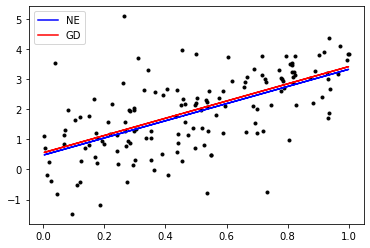

In [60]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()